In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModel



In [2]:

data = pd.read_excel('./Cost Estimation data/Material Costs.xlsx')
data

,Project ID,Material name,Material type,Material Description,Retailer,Town,Unit,Quantity,Price (Ksh),Date collected,Contact method,Source,Email address
0,Retail Surveys,Iron Sheets,Box profile,NaN,Mabati Rolling Mills Factory,Nairobi,m,1,400,2025-10-03,254100897026,facebook,NaN
1,Retail Surveys,Iron Sheets,Ordinary,NaN,Mabati Rolling Mills Factory,Nairobi,m,1,300,2025-10-03,254100897026,facebook,NaN
2,Retail Surveys,Iron Sheets,Corrugated,NaN,Mabati Rolling Mills Factory,Nairobi,m,1,350,2025-10-03,254100897026,facebook,NaN
3,Retail Surveys,Iron Sheets,Jenga Tile,NaN,Mabati Rolling Mills Factory,Nairobi,m,1,650,2025-10-03,254100897026,facebook,NaN
4,Retail Surveys,Roofing Tiles,Classic Brit Tile,NaN,Mabati Rolling Mills Factory,Nairobi,m,1,650,2025-10-03,254100897026,facebook,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Retail Surveys,Building Stones,"9""",NaN,Randtech Enterprices,Nairobi,pcs,1,60,2025-12-03,254716264824,Google,randtechke@gmail.com
248,Retail Surveys,Damp proof course,NaN,DPC per roll 7 metres,Randtech Enterprices,Nairobi,roll,1,3100,2025-12-03,254716264824,Google,randtechke@gmail.com
249,Retail Surveys,Damp proof membrane,1000 gauge,NaN,Randtech Enterprices,Nairobi,roll,1,3300,2025-12-03,254716264824,Google,randtechke@gmail.com
250,Retail Surveys,Chicken wire,"3/4"" * 30",NaN,Randtech Enterprices,Nairobi,roll,1,1800,2025-12-03,254716264824,Google,randtechke@gmail.com


In [3]:
# Display the first rows of the dataset
print(data.head())

# Check the structure and types of data
print(data.info())

# Check for missing values in each column
print(data.isnull().sum())

# Describe numerical features to get statistical insights
print(data.describe())


       Project ID  Material name      Material type Material Description  \
0  Retail Surveys    Iron Sheets        Box profile                  NaN   
1  Retail Surveys    Iron Sheets           Ordinary                  NaN   
2  Retail Surveys    Iron Sheets         Corrugated                  NaN   
3  Retail Surveys    Iron Sheets         Jenga Tile                  NaN   
4  Retail Surveys  Roofing Tiles  Classic Brit Tile                  NaN   

                       Retailer     Town Unit  Quantity  Price (Ksh)  \
0  Mabati Rolling Mills Factory  Nairobi     m        1          400   
1  Mabati Rolling Mills Factory  Nairobi     m        1          300   
2  Mabati Rolling Mills Factory  Nairobi     m        1          350   
3  Mabati Rolling Mills Factory  Nairobi     m        1          650   
4  Mabati Rolling Mills Factory  Nairobi     m        1          650   

  Date collected Contact method    Source Email address  
0     2025-10-03   254100897026  facebook           

In [4]:
# Drop columns with many missing values which aren't useful analytically
data_cleaned = data.drop(['Email address', 'Material Description'], axis=1)

# Fill remaining missing categorical columns using mode (most frequent value)
for column in ['Material name', 'Material type', 'Unit ', 'Quantity', 'Contact method']:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mode()[0])

# Verify changes
print(data_cleaned.isnull().sum())


Project ID        0
Material name     0
Material type     0
Retailer          0
Town              0
Unit              0
Quantity          0
Price (Ksh)       0
Date collected    0
Contact method    0
Source            0
dtype: int64


In [5]:
# Verify missing values have been handled now
print(data_cleaned.isnull().sum())

# Quick look at the cleaned data
print(data_cleaned.head())



Project ID        0
Material name     0
Material type     0
Retailer          0
Town              0
Unit              0
Quantity          0
Price (Ksh)       0
Date collected    0
Contact method    0
Source            0
dtype: int64
       Project ID  Material name      Material type  \
0  Retail Surveys    Iron Sheets        Box profile   
1  Retail Surveys    Iron Sheets           Ordinary   
2  Retail Surveys    Iron Sheets         Corrugated   
3  Retail Surveys    Iron Sheets         Jenga Tile   
4  Retail Surveys  Roofing Tiles  Classic Brit Tile   

                       Retailer     Town Unit  Quantity  Price (Ksh)  \
0  Mabati Rolling Mills Factory  Nairobi     m        1          400   
1  Mabati Rolling Mills Factory  Nairobi     m        1          300   
2  Mabati Rolling Mills Factory  Nairobi     m        1          350   
3  Mabati Rolling Mills Factory  Nairobi     m        1          650   
4  Mabati Rolling Mills Factory  Nairobi     m        1          650   

  D

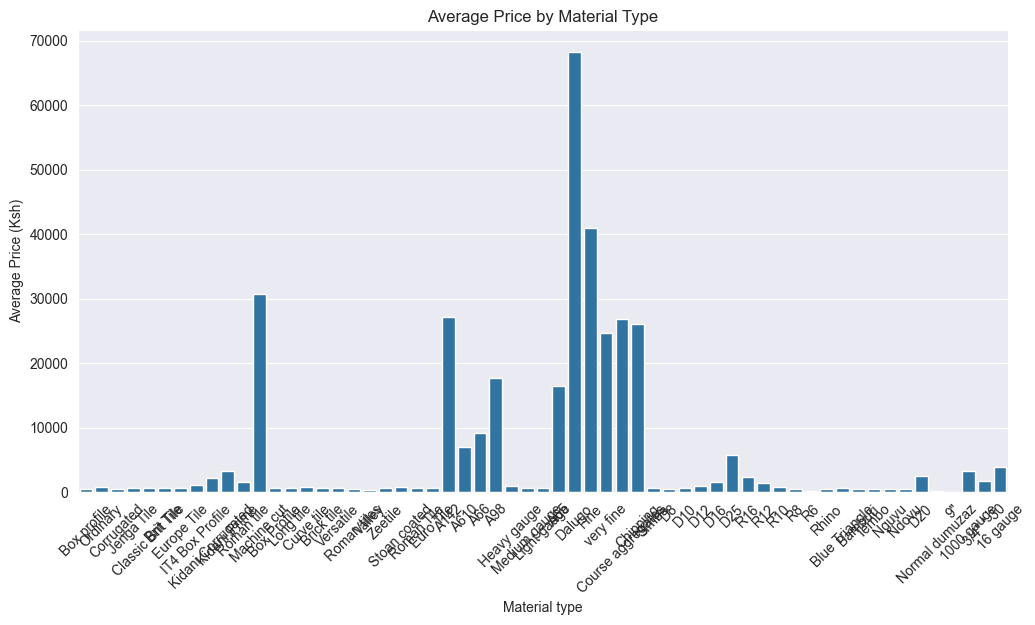

In [6]:


# Average price per Material type
plt.figure(figsize=(12, 6))
sns.barplot(x='Material type', y='Price (Ksh)', data=data_cleaned, errorbar=None)
plt.title('Average Price by Material Type')
plt.xticks(rotation=45)
plt.ylabel('Average Price (Ksh)')
plt.show()


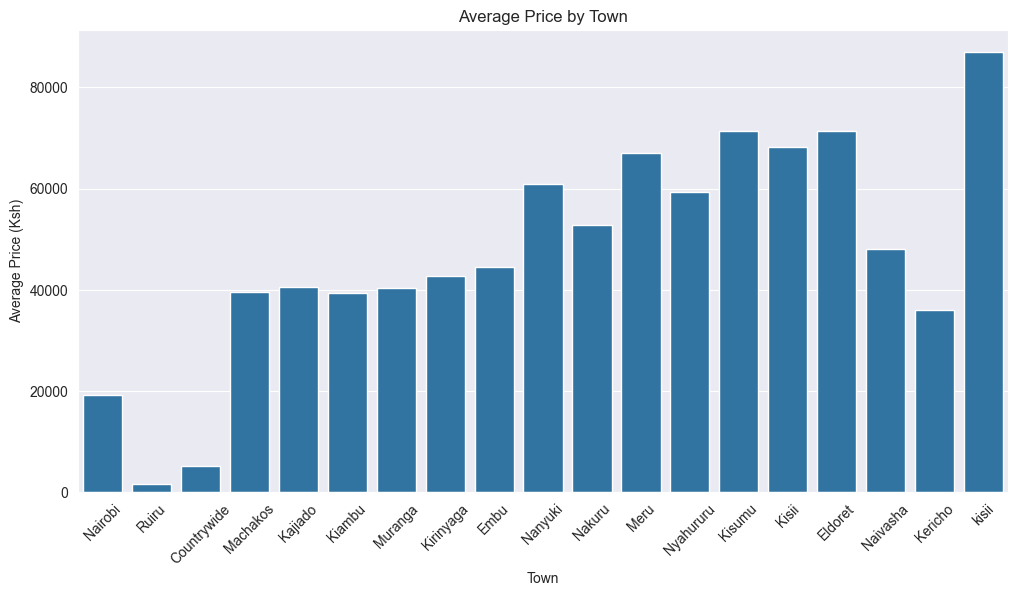

In [7]:
# Average price per Town
plt.figure(figsize=(12, 6))
sns.barplot(x='Town', y='Price (Ksh)', data=data_cleaned, errorbar=None)
plt.title('Average Price by Town')
plt.xticks(rotation=45)
plt.ylabel('Average Price (Ksh)')
plt.show()


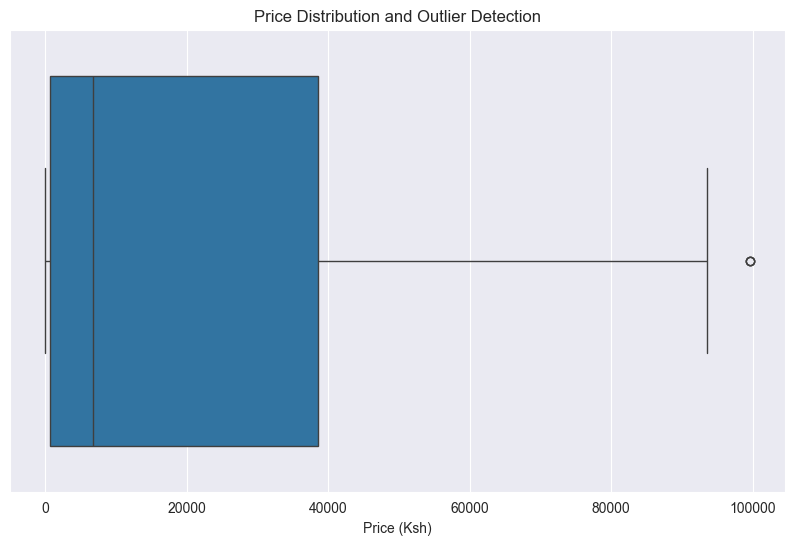

In [8]:
# Price distribution visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='Price (Ksh)')
plt.title('Price Distribution and Outlier Detection')
plt.xlabel('Price (Ksh)')
plt.show()


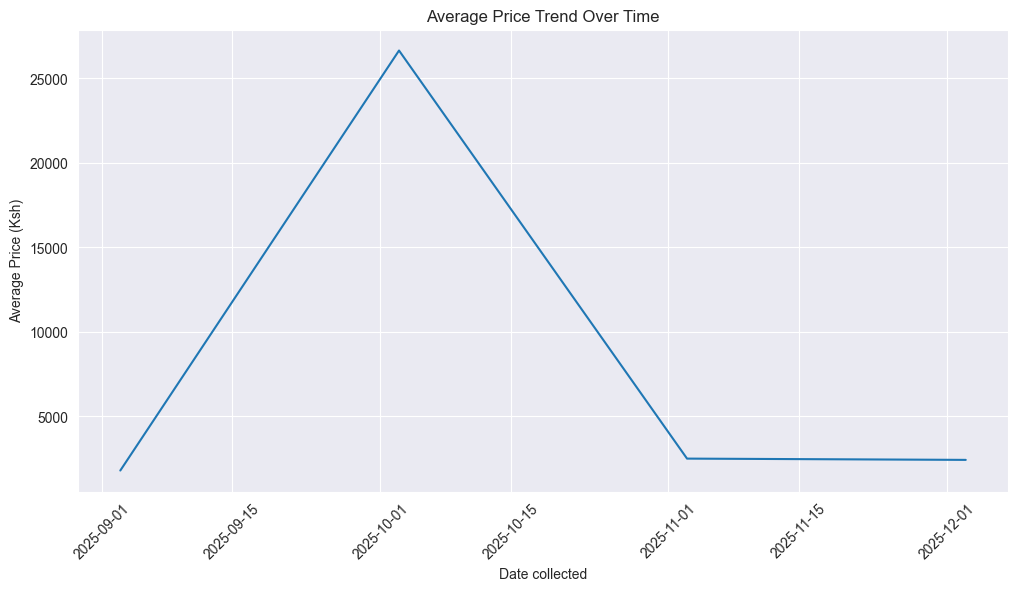

In [9]:
# Average price trends over time
time_trends = data_cleaned.groupby('Date collected')['Price (Ksh)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date collected', y='Price (Ksh)', data=time_trends)
plt.title('Average Price Trend Over Time')
plt.ylabel('Average Price (Ksh)')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Correct and safely evaluate expressions like "44*2.9" in 'Quantity'
data_cleaned['Quantity'] = data_cleaned['Quantity'].apply(lambda x: eval(str(x)) if '*' in str(x) else x)
data_cleaned['Quantity'] = pd.to_numeric(data_cleaned['Quantity'], errors='coerce')

# Check for any remaining NaNs after conversion
print(data_cleaned['Quantity'].isnull().sum())


0


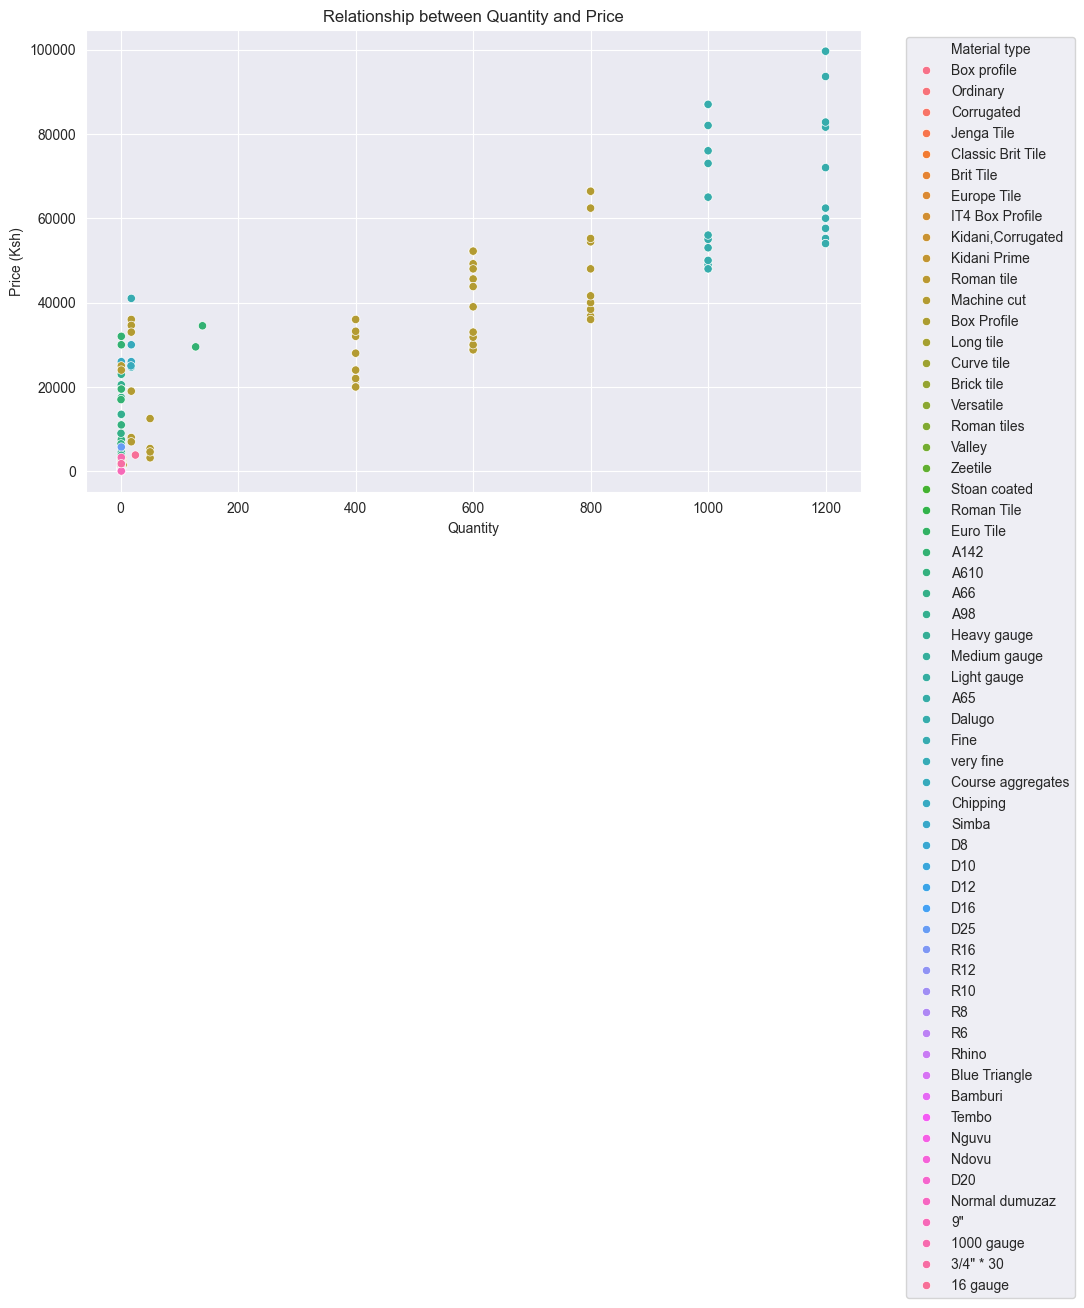

In [11]:
# Retry plotting the relationship between Quantity and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price (Ksh)', data=data_cleaned, hue='Material type')
plt.title('Relationship between Quantity and Price')
plt.xlabel('Quantity')
plt.ylabel('Price (Ksh)')
plt.legend(title='Material type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [12]:
# Creating Unit Price feature
data_cleaned['Unit Price'] = data_cleaned['Price (Ksh)'] / data_cleaned['Quantity']

# Verify new column created successfully
print(data_cleaned[['Material name', 'Quantity', 'Price (Ksh)', 'Unit Price']].head())


   Material name  Quantity  Price (Ksh)  Unit Price
0    Iron Sheets       1.0          400       400.0
1    Iron Sheets       1.0          300       300.0
2    Iron Sheets       1.0          350       350.0
3    Iron Sheets       1.0          650       650.0
4  Roofing Tiles       1.0          650       650.0


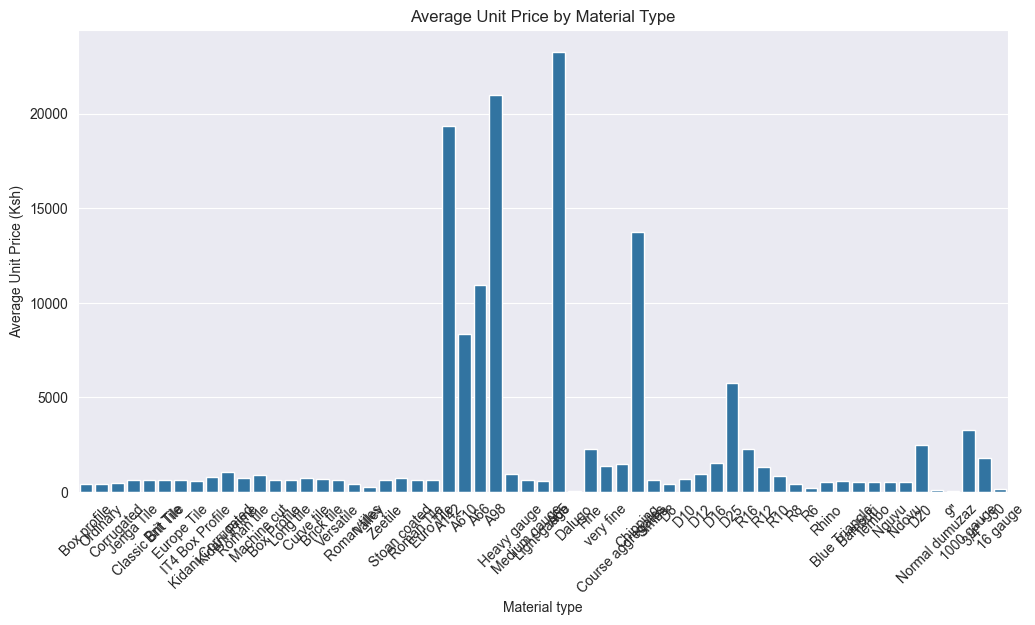

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Material type', y='Unit Price', data=data_cleaned, errorbar=None)
plt.title('Average Unit Price by Material Type')
plt.ylabel('Average Unit Price (Ksh)')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Statistical Summary
summary_stats = data_cleaned.describe(include=[np.number])
print(summary_stats)


          Quantity   Price (Ksh)    Unit Price
count   252.000000    252.000000    252.000000
mean    302.733333  22487.948413   2148.318328
std     428.634198  26821.536363   5830.074170
min       0.500000     15.000000     15.000000
25%       1.000000    650.000000     70.000000
50%       2.000000   6750.000000    450.000000
75%     600.000000  38550.000000    751.250000
max    1200.000000  99600.000000  34000.000000


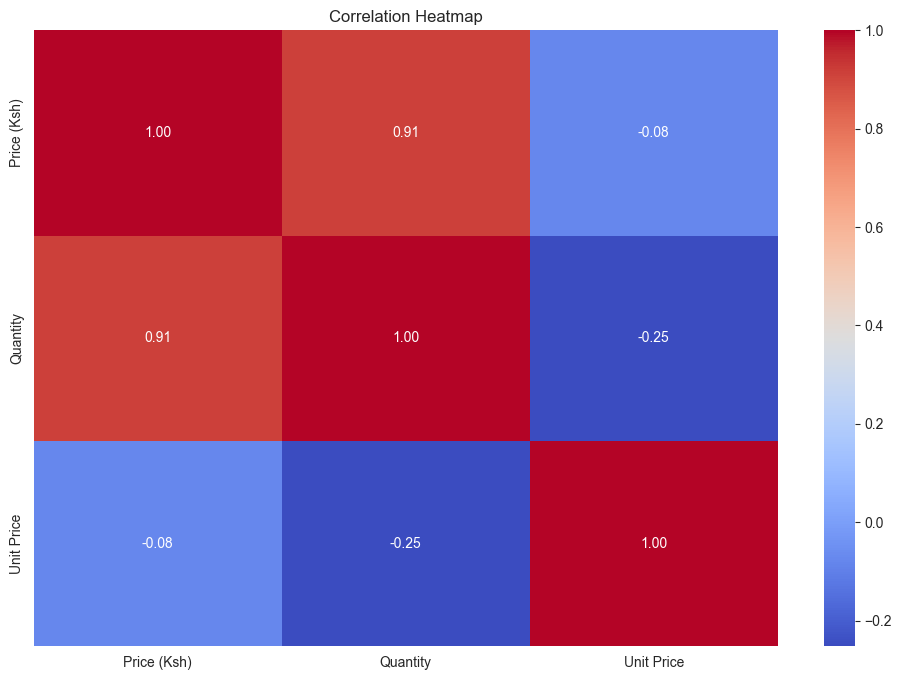

In [15]:
# Explore correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data_cleaned[['Price (Ksh)', 'Quantity', 'Unit Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [16]:
# Saving cleaned data for later use
data_cleaned.to_csv('cleaned_data.csv', index=False)


In [17]:

from sklearn.model_selection import train_test_split
# Create textual input
data_cleaned['text_input'] = data_cleaned['Material type'] + ' ' + \
                             data_cleaned['Material name'] + ' from ' + \
                             data_cleaned['Retailer'] + ' located in ' + \
                             data_cleaned['Town']

# Features and target:
texts = data_cleaned['text_input'].tolist()
prices = data_cleaned['Price (Ksh)'].values.astype(float)

# Split data into train and test (80-20)
train_texts, test_texts, train_prices, test_prices = train_test_split(
    texts, prices, test_size=0.2, random_state=42
)

print("Texts prepared and split successfully.")


Texts prepared and split successfully.


In [18]:
from transformers import DistilBertTokenizer
import torch
from torch.utils.data import DataLoader, Dataset

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


# Custom Dataset
class PriceDataset(Dataset):
    def __init__(self, texts, targets, tokenizer, max_length=64):
        self.texts = texts
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt'
        )
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['labels'] = torch.tensor(self.targets[idx], dtype=torch.float)
        return item


# Creating datasets
train_dataset = PriceDataset(train_texts, train_prices, tokenizer)
test_dataset = PriceDataset(test_texts, test_prices, tokenizer)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("Datasets and data loaders created successfully.")


Datasets and data loaders created successfully.


In [19]:
from transformers import DistilBertModel
import torch.nn as nn


class PriceRegressor(nn.Module):
    def __init__(self):
        super(PriceRegressor, self).__init__()
        self.model = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.regressor = nn.Linear(self.model.config.dim, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = outputs.last_hidden_state[:, 0]  # taking [CLS] token
        output = self.regressor(hidden_state)
        return output.squeeze()


# Instantiate the model
model = PriceRegressor()


NameError: name 'init_empty_weights' is not defined

In [2]:
import transformers
import torch

print(f"Transformers version: {transformers.__version__}")  # Should be 4.34.1
print(f"Torch version: {torch.__version__}")  # Should be 2.1.2

from transformers import DistilBertModel
import torch.nn as nn


class PriceRegressor(nn.Module):
    def __init__(self):
        super(PriceRegressor, self).__init__()
        self.model = DistilBertModel.from_pretrained('distilbert-base-uncased')
        hidden_size = self.model.config.hidden_size
        self.regressor = nn.Linear(hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        cls_token_hidden_state = outputs.last_hidden_state[:, 0]  # correctly retrieves [CLS]
        return self.regressor(cls_token_hidden_state)


# Carefully instantiate the model right here:
model = PriceRegressor()

print("Model created successfully! ✅")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hp\Documents\teknok_ai\.venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\hp\Documents\teknok_ai\.venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hp\Documents\teknok_ai\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File 

Transformers version: 4.51.0
Torch version: 2.2.1+cpu


NameError: name 'init_empty_weights' is not defined

In [1]:
print(dir(model))

NameError: name 'model' is not defined

In [1]:
pip show transformers torch

Name: transformers
Version: 4.51.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: C:\Users\hp\Documents\teknok_ai\.venv\Lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
---
Name: torch
Version: 2.2.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: C:\Users\hp\Documents\teknok_ai\.venv\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use update

In [20]:
#STEEP 4
import torch.optim as optim

# Device (GPU/CPU support)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Optimizer and Loss function
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.MSELoss()

epochs = 3

model.train()
for epoch in range(epochs):
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        predictions = model(input_ids, attention_mask)

        loss = loss_fn(predictions, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}')

print("Training complete.")


NameError: name 'model' is not defined

In [21]:
# STEP 5

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask)
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(batch['labels'].cpu().numpy())

# Calculate metrics
rmse = mean_squared_error(actuals, predictions, squared=False)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')


NameError: name 'model' is not defined